# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city

# Load the cities from the CSV file
cities_df = pd.read_csv('output_data/cities.csv')

# Extract the list of cities (use the 'City' column from the CSV)
cities = cities_df['City'].tolist()

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faya
Processing Record 2 of Set 1 | farsund
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | lanzhou
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | saint-pierre
Processing Record 11 of Set 1 | colorado
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | trairi
Processing Record 14 of Set 1 | dobryanka
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | nuevo laredo
Processing Record 23 of Set 1 | guiratinga
Pr

KeyboardInterrupt: 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
cities_df # Done in the step above

# Show Record Count
cities_df.count()

City_ID       577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [6]:
# Display sample data
cities_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [7]:
# Export the City_Data into a csv
cities_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

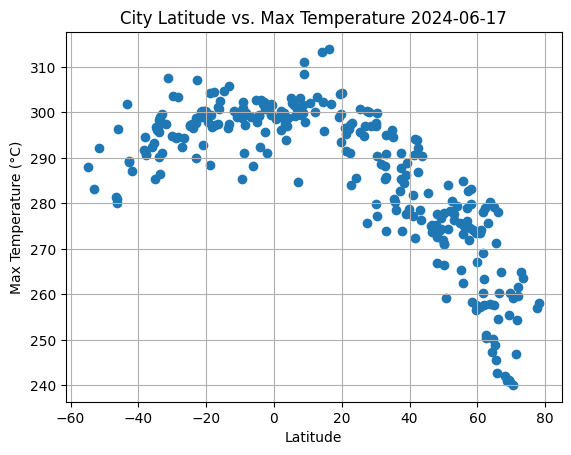

In [14]:
# Filter data for the date 2024-06-17
filtered_data = [city for city in city_data if city['Date'] == 2024-6-17]


# Build scatter plot for latitude vs. temperature
latitudes = [city['Lat'] for city in city_data]
max_temperatures = [city['Max Temp'] for city in city_data]

plt.scatter(latitudes, max_temperatures)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature 2024-06-17')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

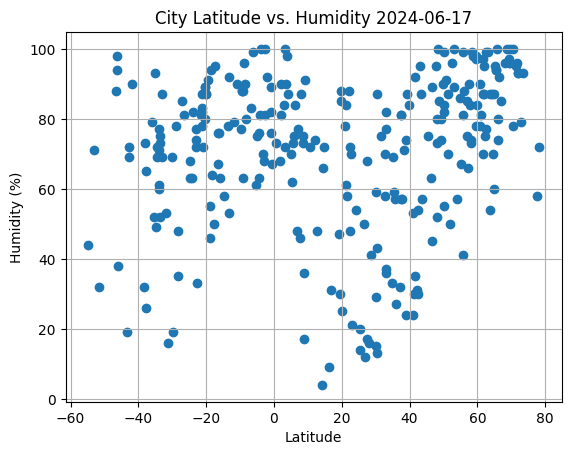

In [15]:
# Filter data for the date 2024-06-17
filtered_data = [city for city in city_data if city['Date'] == 2024-6-17]

# Build the scatter plots for latitude vs. humidity
latitudes = [city['Lat'] for city in city_data]
humidities = [city['Humidity'] for city in city_data]

plt.scatter(latitudes, humidities)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity 2024-06-17')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

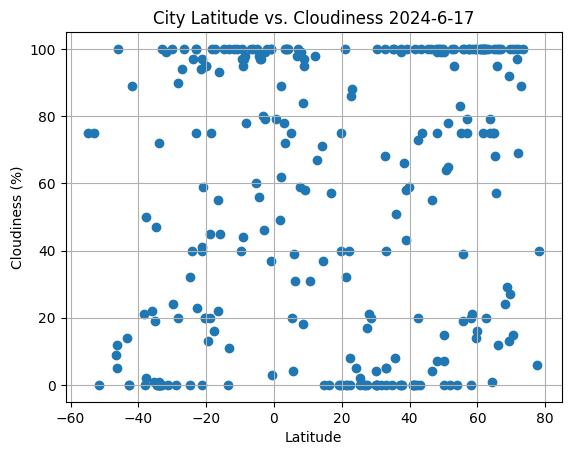

In [ ]:
# Filter data for the date 2024-06-17
filtered_data = [city for city in city_data if city['Date'] == 2024-6-17]

# Build the scatter plots for latitude vs. cloudiness
latitudes = [city['Lat'] for city in city_data]
cloudiness = [city['Cloudiness'] for city in city_data]

plt.scatter(latitudes, cloudiness)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness 2024-6-17')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

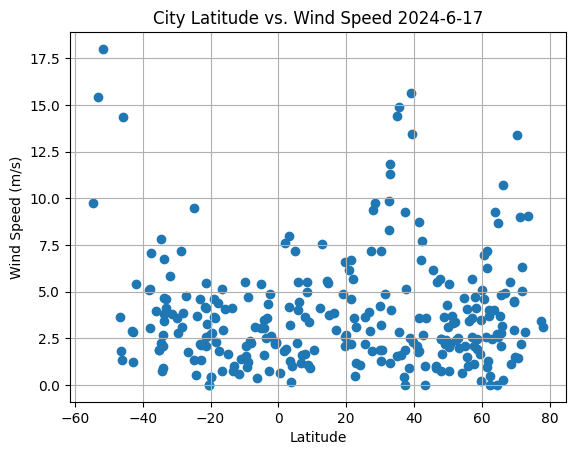

In [19]:
# Filter data for the date 2024-06-17
filtered_data = [city for city in city_data if city['Date'] == 2024-6-17]

# Build the scatter plots for latitude vs. cloudiness
latitudes = [city['Lat'] for city in city_data]
cloudiness = [city['Wind Speed'] for city in city_data]

plt.scatter(latitudes, cloudiness)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed 2024-6-17')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def linear_regression(x_data, y_data):
    
    x_data = np.array(x_data)
    y_data = np.array(y_data)

    # Number of data points
    n = len(x_data)

    xy = np.sum(x_data * y_data)
    x_sum = np.sum(x_data)
    y_sum = np.sum(y_data)
    x_squared_sum = np.sum(x_data ** 2)

    # Calculate slope (m) and intercept (b)
    m = (n * xy - x_sum * y_sum) / (n * x_squared_sum - x_sum ** 2)
    b = (y_sum - m * x_sum) / n

    return m, b

# Define a function to create Linear Regression plots for each relationship
def create_linear_regression_plot(x_data, y_data, xlabel, ylabel, title, filename):
   
    m, b = linear_regression(x_data, y_data)
    y_pred = m * np.array(x_data) + b

    # Plot the original data and the linear regression line
    plt.scatter(x_data, y_data, color='blue', label='Data Points')
    plt.plot(x_data, y_pred, color='red', label=f'Linear Regression: y = {m:.2f}x + {b:.2f}')

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_data = [city for city in city_data if city['Lat'] >= 0]
northern_hemi_df = pd.DataFrame(northern_hemi_data)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,6.7596,19.2731,300.71,48,98,1.19,CF,1742404036
1,farsund,58.0948,6.8047,279.79,74,0,4.71,NO,1742403782
2,jamestown,42.0970,-79.2353,293.95,31,0,6.69,US,1742403784
3,lanzhou,36.0564,103.7922,278.67,27,51,1.60,CN,1742404040
4,albany,42.6001,-73.9662,292.28,30,20,2.68,US,1742403935


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_data = [city for city in city_data if city['Lat'] < 0]
southern_hemi_df = pd.DataFrame(southern_hemi_data)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,289.22,72,0,1.25,AU,1742404038
1,ushuaia,-54.8000,-68.3000,287.96,44,75,9.77,AR,1742403683
2,carnarvon,-24.8667,113.6333,297.33,68,0,9.49,AU,1742404045
3,saint-pierre,-21.3393,55.4781,298.97,83,0,2.57,RE,1742404047
4,colorado,-22.8375,-51.9731,307.07,33,23,1.31,BR,1742403829


###  Temperature vs. Latitude Linear Regression Plot

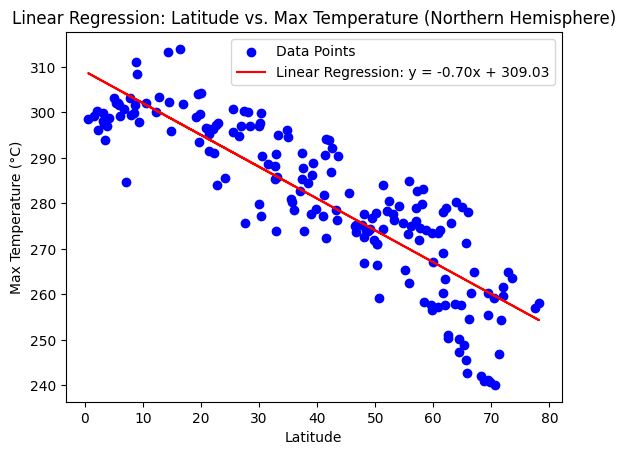

In [25]:
# Linear regression on Northern Hemisphere
latitudes = northern_hemi_df['Lat']
max_temperatures = northern_hemi_df['Max Temp']

m, b = linear_regression(latitudes, max_temperatures)

# Predict the max temperature using the linear regression model
y_pred = m * np.array(latitudes) + b

# Plot the original data and the linear regression line
plt.scatter(latitudes, max_temperatures, color='blue', label='Data Points')
plt.plot(latitudes, y_pred, color='red', label=f'Linear Regression: y = {m:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Linear Regression: Latitude vs. Max Temperature (Northern Hemisphere)')

# Show plot
plt.legend()
plt.show()

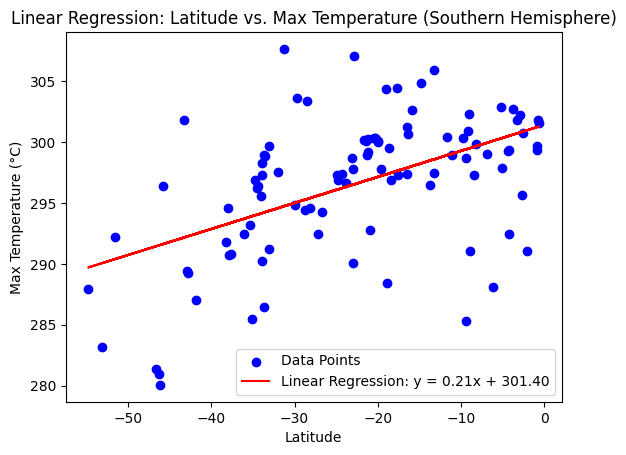

In [26]:
# Linear regression on Southern Hemisphere
latitudes = southern_hemi_df['Lat']
max_temperatures = southern_hemi_df['Max Temp']

m, b = linear_regression(latitudes, max_temperatures)

# Predict the max temperature using the linear regression model
y_pred = m * np.array(latitudes) + b

# Plot the original data and the linear regression line
plt.scatter(latitudes, max_temperatures, color='blue', label='Data Points')
plt.plot(latitudes, y_pred, color='red', label=f'Linear Regression: y = {m:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.title('Linear Regression: Latitude vs. Max Temperature (Southern Hemisphere)')

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** 

The linear relationship between latitude and weather parameters, like temperature, shows how geography affects climate. For example, a negative slope in the relationship between latitude and max temperature (e.g., "y = -0.70x + 309.03") suggests that temperatures decrease as you move away from the equator. The intercept gives the estimated temperature at the equator.

This trend aligns with the expectation that regions closer to the equator are warmer, and temperatures drop as latitude increases. While temperature shows a clear linear pattern, other factors like humidity or wind speed might not follow the same simple trend. This analysis helps in understanding climate patterns across different regions.

### Humidity vs. Latitude Linear Regression Plot

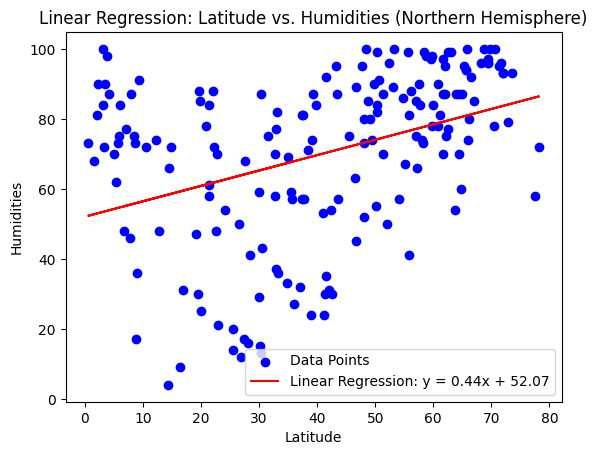

In [30]:
# Northern Hemisphere
latitudes = northern_hemi_df['Lat']
humidities = northern_hemi_df['Humidity']

m, b = linear_regression(latitudes, humidities)

# Predict the max temperature using the linear regression model
y_pred = m * np.array(latitudes) + b

# Plot the original data and the linear regression line
plt.scatter(latitudes, humidities, color='blue', label='Data Points')
plt.plot(latitudes, y_pred, color='red', label=f'Linear Regression: y = {m:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidities')
plt.title('Linear Regression: Latitude vs. Humidities (Northern Hemisphere)')

# Show plot
plt.legend()
plt.show()

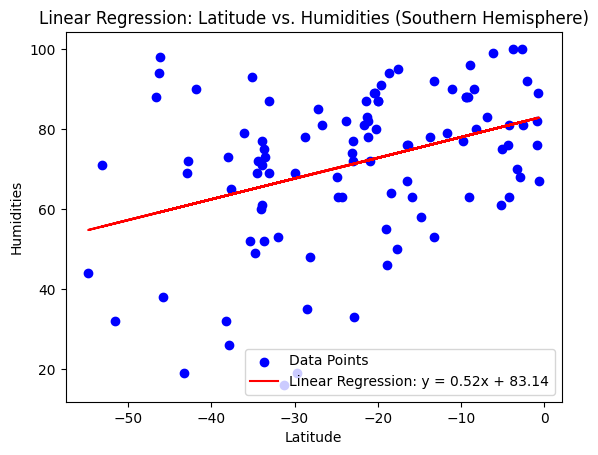

In [31]:
# Southern Hemisphere
latitudes = southern_hemi_df['Lat']
humidities = southern_hemi_df['Humidity']

m, b = linear_regression(latitudes, humidities)

# Predict the max temperature using the linear regression model
y_pred = m * np.array(latitudes) + b

# Plot the original data and the linear regression line
plt.scatter(latitudes, humidities, color='blue', label='Data Points')
plt.plot(latitudes, y_pred, color='red', label=f'Linear Regression: y = {m:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidities')
plt.title('Linear Regression: Latitude vs. Humidities (Southern Hemisphere)')

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: In the Northern Hemisphere, humidity tends to be higher near the equator and decreases as you move toward the poles. This pattern is influenced by the availability of water, warmer temperatures, and proximity to oceans. The relationship may show a moderate negative slope, indicating that as latitude increases, humidity generally decreases, particularly in arid or semi-arid regions further north.

Southern Hemisphere: In the Southern Hemisphere, the relationship is similar. Areas closer to the equator, like tropical rainforests, generally have higher humidity levels. As you move southward toward the poles, humidity tends to drop. However, the exact pattern may vary depending on factors like ocean currents and seasonal changes. The Southern Hemisphere has a larger expanse of ocean, which can also impact humidity levels differently than in the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

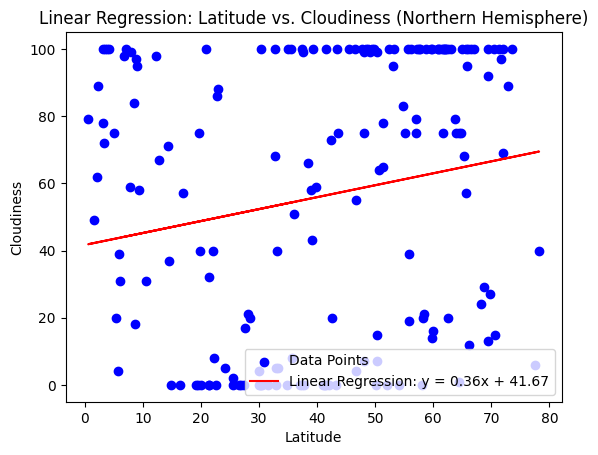

In [32]:
# Northern Hemisphere
latitudes = northern_hemi_df['Lat']
cloudiness = northern_hemi_df['Cloudiness']

m, b = linear_regression(latitudes, cloudiness)

# Predict the max temperature using the linear regression model
y_pred = m * np.array(latitudes) + b

# Plot the original data and the linear regression line
plt.scatter(latitudes, cloudiness, color='blue', label='Data Points')
plt.plot(latitudes, y_pred, color='red', label=f'Linear Regression: y = {m:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Latitude vs. Cloudiness (Northern Hemisphere)')

# Show plot
plt.legend()
plt.show()

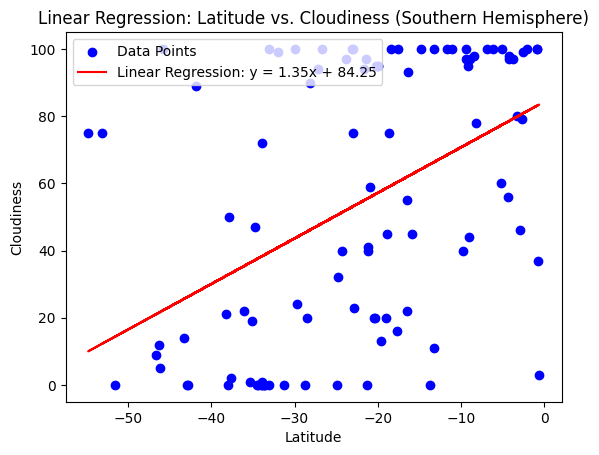

In [33]:
# Southern Hemisphere
latitudes = southern_hemi_df['Lat']
cloudiness = southern_hemi_df['Cloudiness']

m, b = linear_regression(latitudes, cloudiness)

# Predict the max temperature using the linear regression model
y_pred = m * np.array(latitudes) + b

# Plot the original data and the linear regression line
plt.scatter(latitudes, cloudiness, color='blue', label='Data Points')
plt.plot(latitudes, y_pred, color='red', label=f'Linear Regression: y = {m:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Latitude vs. Cloudiness (Southern Hemisphere)')

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** 

Northern Hemisphere: In the Northern Hemisphere, cloudiness is generally higher near the equator due to warmer temperatures and increased evaporation. As you move toward the poles, cloudiness tends to decrease, especially in the more arid regions. However, the relationship can vary depending on local weather patterns, such as the presence of large bodies of water or mountain ranges.

Southern Hemisphere: In the Southern Hemisphere, cloudiness also tends to be higher near the equator, particularly in tropical regions. As you move southward toward the poles, cloud cover decreases, though areas with large oceans may still have relatively high cloudiness. The Southern Hemisphere's oceans play a significant role in maintaining moisture levels that contribute to cloud formation.

### Wind Speed vs. Latitude Linear Regression Plot

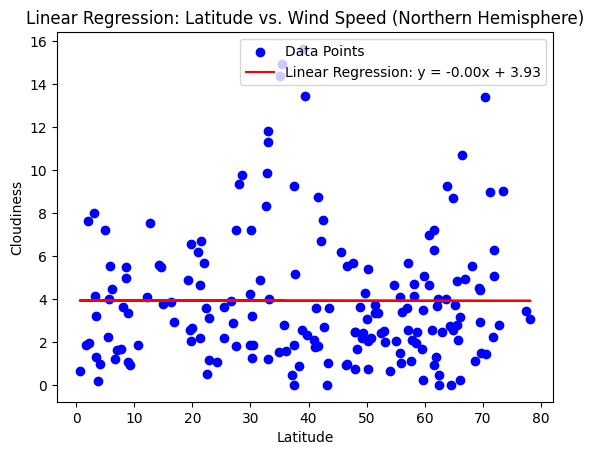

In [34]:
# Northern Hemisphere
latitudes = northern_hemi_df['Lat']
wind_speeds = northern_hemi_df['Wind Speed']

m, b = linear_regression(latitudes, wind_speeds)

# Predict the max temperature using the linear regression model
y_pred = m * np.array(latitudes) + b

# Plot the original data and the linear regression line
plt.scatter(latitudes, wind_speeds, color='blue', label='Data Points')
plt.plot(latitudes, y_pred, color='red', label=f'Linear Regression: y = {m:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Latitude vs. Wind Speed (Northern Hemisphere)')

# Show plot
plt.legend()
plt.show()

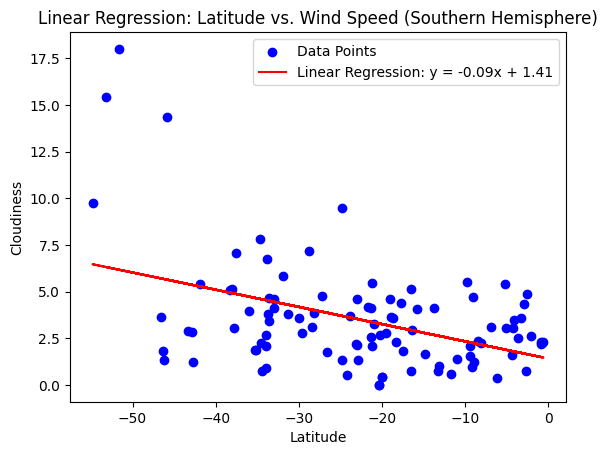

In [35]:
# Southern Hemisphere
latitudes = southern_hemi_df['Lat']
wind_speeds = southern_hemi_df['Wind Speed']

m, b = linear_regression(latitudes, wind_speeds)

# Predict the max temperature using the linear regression model
y_pred = m * np.array(latitudes) + b

# Plot the original data and the linear regression line
plt.scatter(latitudes, wind_speeds, color='blue', label='Data Points')
plt.plot(latitudes, y_pred, color='red', label=f'Linear Regression: y = {m:.2f}x + {b:.2f}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Latitude vs. Wind Speed (Southern Hemisphere)')

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** 

Wind speeds are generally higher near the equator and decrease as you move toward the poles. In both hemispheres, jet streams and storms can increase wind speeds at higher latitudes, with the Southern Hemisphere's oceans helping maintain more consistent winds.